In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline
from scipy import stats

In [14]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [164]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [9]:
from regression_function import regx2

In [ ]:
# ridge = Ridge()
# lasso = Lasso()
# net   = ElasticNet()

In [79]:
model_vars_data = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp August\Machine Learning Project\data\model_vars_data.csv',index_col=0)

test_vars_data = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp August\Machine Learning Project\data\test_vars_data.csv',index_col=0)

price_train = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp August\Machine Learning Project\data\y_train.csv',index_col=0)

price_test = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp August\Machine Learning Project\data\y_test.csv',index_col=0)

In [80]:
def miss_cols(df):
    missing = np.sum(df.isnull(),axis=0)
    
    miss_ind = np.sum(df.isnull(),axis=0) > 0
    
    vals = pd.Series(filter(lambda x: x != 0,missing))
     
    cols_miss = df.columns[miss_ind]

    L=list(zip(cols_miss,vals, round(vals/df.shape[0],4)))
    
    return sorted(L,reverse=True,key=lambda x: x[2])  

In [21]:
miss_cols(model_vars_data)


[('GarageYrBlt', 95, 0.0526)]

In [81]:
model_vars_data.drop(['GarageYrBlt'],axis=1, inplace = True)
miss_cols(model_vars_data)

[]

In [82]:
test_vars_data.drop(['GarageYrBlt'],axis=1, inplace = True)
miss_cols(test_vars_data)

[]

In [8]:
price_train.head(2)

,SalePrice
1711,123000
1729,154400


In [83]:
pd.set_option('display.max_columns', None)
model_vars_data.head(3)

,bc_GrLivArea,log_LotArea,log_MasVnrArea,yeo_TotalBsmtSF,log_first_FlrSF,yeo_GarageArea,log_WoodDeckSF,log_OpenPorchSF,has_pool,log_BsmtFinSF1,log_2ndFlrSF,log_LotFrontage,log_BsmtUnfSF,log_EnclosedPorch,BsmtFinType1,YearRemodAdd,ExterCond,BsmtExposure,BsmtFinSF2,EnclosedPorch,BsmtHalfBath,Fireplaces,YearBuilt,BsmtFinType2,OverallQual,ScreenPorch,GarageQual,BsmtFullBath,GarageCond,BsmtFinSF1,HalfBath,LandSlope,FireplaceQu,LotFrontage,FullBath,BsmtQual,LotShape,HeatingQC,YrSold,KitchenQual,TotRmsAbvGrd,KitchenAbvGr,Functional,BedroomAbvGr,GarageCars,ExterQual,OverallCond,BsmtCond,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mixed,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,GarageFinish_No,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1711,8.306749,9.271812,0.0,197.803808,7.184629,115.298257,4.204693,0.000000,False,6.061457,0.000000,4.382027,0.000000,0.000000,4,1953,3,0,180.0,0,0.0,0,1953,2,5,0,3,1.0,3,428.0,0,3,0,79.0,1,3,4,3,2009,3,5,1,6,3,1.0,3,6,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,

In [84]:
pd.set_option('display.max_columns', None)
test_vars_data.head(3)

,bc_GrLivArea,log_LotArea,log_MasVnrArea,yeo_TotalBsmtSF,log_first_FlrSF,yeo_GarageArea,log_WoodDeckSF,log_OpenPorchSF,has_pool,log_BsmtFinSF1,log_2ndFlrSF,log_LotFrontage,log_BsmtUnfSF,log_EnclosedPorch,BsmtFinType1,YearRemodAdd,ExterCond,BsmtExposure,BsmtFinSF2,EnclosedPorch,BsmtHalfBath,Fireplaces,YearBuilt,BsmtFinType2,OverallQual,ScreenPorch,GarageQual,BsmtFullBath,GarageCond,BsmtFinSF1,HalfBath,LandSlope,FireplaceQu,LotFrontage,FullBath,BsmtQual,LotShape,HeatingQC,YrSold,KitchenQual,TotRmsAbvGrd,KitchenAbvGr,Functional,BedroomAbvGr,GarageCars,ExterQual,OverallCond,BsmtCond,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mixed,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,GarageFinish_No,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
953,10.766258,9.017968,0.000000,345.800416,6.959399,247.305063,5.484797,0.0,False,5.666427,0.000000,4.110874,6.641182,0.000000,5,1963,3,0,0.0,0,0.0,0,1963,1,5,109,3,1.0,3,288.0,0,3,0,60.0,1,3,4,4,2007,4,6,1,8,3,2.0,3,7,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,

In [7]:
price_test.head(2)

,SalePrice
953,142100
330,135000


In [241]:
model_vars_data.bc_GrLivArea

1711     8.306749
1729     8.596412
2407     8.419789
287      8.894767
2410     8.758986
733      8.678907
512      8.892124
766      8.460022
1673     8.124030
2524     7.887534
655      7.923925
2099     8.022684
553      8.601307
1806     8.585749
279      7.472223
2179     8.659517
253      8.533739
663      8.382172
250      8.562501
169      7.719093
2427     7.675106
2340     8.167027
1837     8.622318
924      8.817398
1974     8.378353
2086     8.454604
2166     8.211960
31       8.243934
2416     8.362006
1188     8.026392
1553     8.884827
1363     8.361038
1273     8.653255
1880     7.925254
2404     9.320781
1598     8.355218
2214     7.951574
2443     8.667305
1989     7.997709
1358     8.613467
359      9.028831
369      8.582452
794      7.339765
309     10.029898
1462     8.226973
2489     8.062923
1768     8.311774
818      8.416073
906      8.839549
918      8.423495
2032     7.894347
2161     8.599677
1428     8.331691
87       8.362973
2266     7.512431
1719     8

In [242]:
test_vars_data.bc_GrLivArea

953     10.766258
330     10.920659
670     10.922684
302     11.533479
436     11.222439
1829    10.952862
1772    11.551063
1988    10.970802
982     10.848784
1487    11.263604
1446    12.524647
1292    11.813444
1586    13.148983
2384    12.575519
1294    10.680990
704     10.443470
224     11.318087
1370    11.895990
1528    11.845051
1900    11.284828
296     12.178069
1328    11.640375
1160    11.357795
828     12.252907
487     12.969715
2570    10.738150
438     12.008573
2456    10.848784
1953    10.448348
1923    11.381676
1506    11.894588
667     10.890100
326     11.151129
1811    12.373306
1175    10.894196
33      12.082875
2234    12.016632
1818    10.399139
1992    10.772701
2060    10.282165
2513    13.361366
1887    12.132170
743     12.830990
457     11.325035
543     11.640375
1785    11.823541
1831    10.142989
672     10.857100
1068    12.728029
195     11.829293
1748    10.282165
1199    11.590602
192     10.800436
289     12.322174
711     12.035342
1512    12

In [75]:
def to_keep(it_lasso, amt):
    keeps1 = it_lasso.loc[it_lasso['abs_val'] > amt,['features']]
    list_keeps1 = list(keeps1.features)
    return list_keeps1

best params:  {'alpha': 0.001}
score:  0.9470479866992151
  
test score:  -4.581474349471069
adj_r2:  0.9396219936778795
  
adj_r2_test:  -6.83027163727974
 
train RMSE: 0.08823831212478267
  
test RMSE: 0.9354878841660568
                  features      coef   abs_val
0             bc_GrLivArea  0.129839  0.129839
24             OverallQual  0.067738  0.067738
22               YearBuilt  0.058440  0.058440
46             OverallCond  0.046351  0.046351
29              BsmtFinSF1  0.034191  0.034191
1              log_LotArea  0.031153  0.031153
103   Neighborhood_Somerst  0.023179  0.023179
108        Condition1_Norm  0.020334  0.020334
118        Condition2_PosN -0.019452  0.019452
42              Functional  0.017831  0.017831
21              Fireplaces  0.017801  0.017801
85    Neighborhood_Crawfor  0.017074  0.017074
98    Neighborhood_NridgHt  0.016328  0.016328
104   Neighborhood_StoneBr  0.016123  0.016123
3          yeo_TotalBsmtSF  0.015802  0.015802
146    Exterior1st_BrkFac

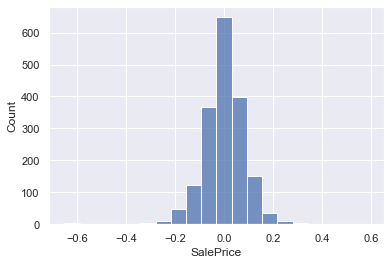

In [85]:
it1_lasso = regx2(model= Lasso(max_iter=3000),
x_train = model_vars_data,
x_test = test_vars_data,
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [220]:
keep1a =  list(filter(lambda x: x!= 'bc_GrLivArea',model_vars_data.columns))

best params:  {'alpha': 0.001}
score:  0.9432780678350458
  
test score:  0.9069500081280129
adj_r2:  0.9353642124004151
  
adj_r2_test:  0.869696297614047
 
train RMSE: 0.09132537444724831
  
test RMSE: 0.12078746600831865
                  features      coef   abs_val
3          log_first_FlrSF  0.097507  0.097507
23             OverallQual  0.071732  0.071732
9             log_2ndFlrSF  0.068772  0.068772
21               YearBuilt  0.054090  0.054090
45             OverallCond  0.045163  0.045163
28              BsmtFinSF1  0.036184  0.036184
0              log_LotArea  0.031940  0.031940
39            TotRmsAbvGrd  0.020303  0.020303
102   Neighborhood_Somerst  0.020227  0.020227
107        Condition1_Norm  0.019721  0.019721
117        Condition2_PosN -0.019497  0.019497
2          yeo_TotalBsmtSF  0.018560  0.018560
84    Neighborhood_Crawfor  0.018338  0.018338
4           yeo_GarageArea  0.018228  0.018228
20              Fireplaces  0.018103  0.018103
33                FullBa

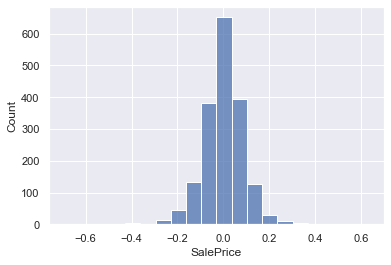

In [222]:
it_lasso1a = regx2(model= Lasso(max_iter=3000),
x_train = model_vars_data[keep1a],
x_test = test_vars_data[keep1a],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [29]:
it1_lasso.to_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp August\Machine Learning Project\linear model iterations\it1_lasso.csv')

In [87]:
keeps = to_keep(it1_lasso,0.000053)
keeps

['bc_GrLivArea',
 'OverallQual',
 'YearBuilt',
 'OverallCond',
 'BsmtFinSF1',
 'log_LotArea',
 'Neighborhood_Somerst',
 'Condition1_Norm',
 'Condition2_PosN',
 'Functional',
 'Fireplaces',
 'Neighborhood_Crawfor',
 'Neighborhood_NridgHt',
 'Neighborhood_StoneBr',
 'yeo_TotalBsmtSF',
 'Exterior1st_BrkFace',
 'Neighborhood_GrnHill',
 'GarageCars',
 'yeo_GarageArea',
 'KitchenQual',
 'BsmtExposure',
 'Neighborhood_NoRidge',
 'SaleCondition_Partial',
 'log_first_FlrSF',
 'MSSubClass_160',
 'YearRemodAdd',
 'BsmtQual',
 'MSZoning_RL',
 'MSZoning_C (all)',
 'ExterQual',
 'Neighborhood_Edwards',
 'HeatingQC',
 'RoofMatl_WdShngl',
 'BsmtFinSF2',
 'Neighborhood_BrkSide',
 'BsmtFullBath',
 'CentralAir_Y',
 'SaleCondition_Family',
 'GarageType_No',
 'Condition1_PosN',
 'TotRmsAbvGrd',
 'KitchenAbvGr',
 'Exterior2nd_VinylSd',
 'GarageCond',
 'PavedDrive_Y',
 'SaleCondition_Normal',
 'RoofStyle_Mansard',
 'MSSubClass_90',
 'ScreenPorch',
 'SaleCondition_Alloca',
 'Neighborhood_MeadowV',
 'FullBath'

best params:  {'alpha': 0.0001}
score:  0.9488518555619613
  
test score:  -5.104951908076179
adj_r2:  0.9442834033128185
  
adj_r2_test:  -6.550604519908619
 
train RMSE: 0.08672232146231737
  
test RMSE: 0.9783738224666646
                  features      coef   abs_val
0             bc_GrLivArea  0.135930  0.135930
1              OverallQual  0.062989  0.062989
2                YearBuilt  0.060393  0.060393
3              OverallCond  0.048582  0.048582
4               BsmtFinSF1  0.041899  0.041899
5              log_LotArea  0.033470  0.033470
6     Neighborhood_Somerst  0.025461  0.025461
38           GarageType_No  0.024513  0.024513
43              GarageCond  0.024263  0.024263
7          Condition1_Norm  0.021704  0.021704
8          Condition2_PosN -0.021317  0.021317
9               Functional  0.018991  0.018991
15     Exterior1st_BrkFace  0.018740  0.018740
24          MSSubClass_160 -0.018319  0.018319
13    Neighborhood_StoneBr  0.017427  0.017427
11    Neighborhood_Craw

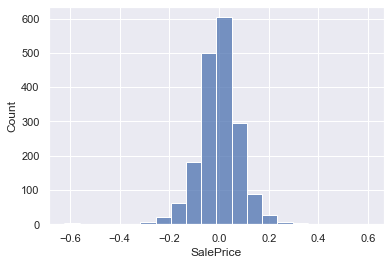

In [88]:
it_lasso2 = regx2(model= Lasso(max_iter=3000),
x_train = model_vars_data[keeps],
x_test = test_vars_data[keeps],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [ ]:
keeps = to_keep(it_lasso1a,0.000053)
keeps

In [225]:
keeps = to_keep(it_lasso1a,0.000021)
# keeps

best params:  {'alpha': 0.001}
score:  0.9432762527604083
  
test score:  0.9069466887074589
adj_r2:  0.93787235208285
  
adj_r2_test:  0.8832301791734833
 
train RMSE: 0.09132683561966023
  
test RMSE: 0.12078962044602232
                  features      coef   abs_val
0          log_first_FlrSF  0.097543  0.097543
1              OverallQual  0.071702  0.071702
2             log_2ndFlrSF  0.068816  0.068816
3                YearBuilt  0.054122  0.054122
4              OverallCond  0.045164  0.045164
5               BsmtFinSF1  0.036119  0.036119
6              log_LotArea  0.031911  0.031911
7             TotRmsAbvGrd  0.020267  0.020267
8     Neighborhood_Somerst  0.020245  0.020245
9          Condition1_Norm  0.019711  0.019711
10         Condition2_PosN -0.019496  0.019496
11         yeo_TotalBsmtSF  0.018540  0.018540
12    Neighborhood_Crawfor  0.018340  0.018340
13          yeo_GarageArea  0.018312  0.018312
14              Fireplaces  0.018154  0.018154
15                FullBat

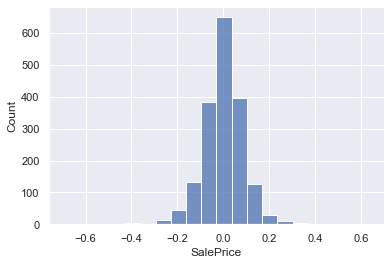

In [224]:
it_lasso2a = regx2(model= Lasso(max_iter=3000),
x_train = model_vars_data[keeps],
x_test = test_vars_data[keeps],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [91]:
keeps = to_keep(it_lasso2,0.000052)
keeps

['bc_GrLivArea',
 'OverallQual',
 'YearBuilt',
 'OverallCond',
 'BsmtFinSF1',
 'log_LotArea',
 'Neighborhood_Somerst',
 'GarageType_No',
 'GarageCond',
 'Condition1_Norm',
 'Condition2_PosN',
 'Functional',
 'Exterior1st_BrkFace',
 'MSSubClass_160',
 'Neighborhood_StoneBr',
 'Neighborhood_Crawfor',
 'Neighborhood_NridgHt',
 'log_BsmtFinSF1',
 'Fireplaces',
 'yeo_TotalBsmtSF',
 'BsmtFinType1',
 'GarageCars',
 'Neighborhood_GrnHill',
 'SaleCondition_Partial',
 'Neighborhood_NoRidge',
 'MSZoning_RL',
 'BsmtExposure',
 'yeo_GarageArea',
 'MSSubClass_60',
 'KitchenQual',
 'MSZoning_C (all)',
 'BsmtFinSF2',
 'BsmtQual',
 'TotRmsAbvGrd',
 'Neighborhood_BrkSide',
 'ExterQual',
 'Neighborhood_Edwards',
 'YearRemodAdd',
 'SaleCondition_Normal',
 'Condition1_PosN',
 'log_LotFrontage',
 'RoofMatl_WdShngl',
 'MSSubClass_90',
 'HeatingQC',
 'Neighborhood_BrDale',
 'Neighborhood_NPkVill',
 'Exterior2nd_VinylSd',
 'BsmtFullBath',
 'SaleCondition_Alloca',
 'CentralAir_Y',
 'FullBath',
 'RoofStyle_Gambr

best params:  {'alpha': 0.0001}
score:  0.9488517736398581
  
test score:  -5.103474382875966
adj_r2:  0.9443504830741072
  
adj_r2_test:  -6.5246980828757914
 
train RMSE: 0.08672239091226715
  
test RMSE: 0.978255421906358
                  features      coef   abs_val
0             bc_GrLivArea  0.135914  0.135914
1              OverallQual  0.062985  0.062985
2                YearBuilt  0.060384  0.060384
3              OverallCond  0.048585  0.048585
4               BsmtFinSF1  0.041901  0.041901
5              log_LotArea  0.033463  0.033463
6     Neighborhood_Somerst  0.025482  0.025482
7            GarageType_No  0.024491  0.024491
8               GarageCond  0.024250  0.024250
9          Condition1_Norm  0.021706  0.021706
10         Condition2_PosN -0.021316  0.021316
11              Functional  0.018989  0.018989
12     Exterior1st_BrkFace  0.018738  0.018738
13          MSSubClass_160 -0.018307  0.018307
14    Neighborhood_StoneBr  0.017426  0.017426
15    Neighborhood_Craw

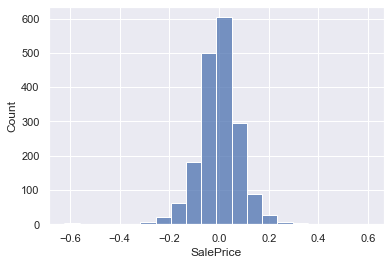

In [92]:
it_lasso3 = regx2(model= Lasso(max_iter=3000),
x_train = model_vars_data[keeps],
x_test = test_vars_data[keeps],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [227]:
keeps = to_keep(it_lasso1a, 0.001000)
# keeps

best params:  {'alpha': 0.001}
score:  0.9430176406538533
  
test score:  0.9071122684586278
adj_r2:  0.9387778817739316
  
adj_r2_test:  0.8891941103680854
 
train RMSE: 0.09153478526969555
  
test RMSE: 0.12068210562402805
                  features      coef   abs_val
0          log_first_FlrSF  0.098078  0.098078
1              OverallQual  0.071998  0.071998
2             log_2ndFlrSF  0.068824  0.068824
3                YearBuilt  0.053918  0.053918
4              OverallCond  0.044848  0.044848
5               BsmtFinSF1  0.035782  0.035782
6              log_LotArea  0.032181  0.032181
8     Neighborhood_Somerst  0.021093  0.021093
7             TotRmsAbvGrd  0.020132  0.020132
9          Condition1_Norm  0.019680  0.019680
10         Condition2_PosN -0.019509  0.019509
12    Neighborhood_Crawfor  0.018414  0.018414
11         yeo_TotalBsmtSF  0.018313  0.018313
14              Fireplaces  0.018028  0.018028
13          yeo_GarageArea  0.017831  0.017831
15                FullB

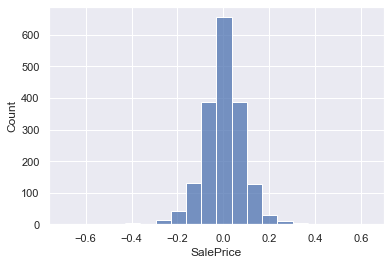

In [228]:
it_lasso3a = regx2(model= Lasso(max_iter=3000),
x_train = model_vars_data[keeps],
x_test = test_vars_data[keeps],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [232]:
keeps = to_keep(it_lasso1a, 0.002000)

best params:  {'alpha': 0.001}
score:  0.9422524643533111
  
test score:  0.9065039962168682
adj_r2:  0.9388655121159687
  
adj_r2_test:  0.892611573663654
 
train RMSE: 0.09214731416764306
  
test RMSE: 0.12107660223206144
                 features      coef   abs_val
0         log_first_FlrSF  0.098338  0.098338
1             OverallQual  0.072479  0.072479
2            log_2ndFlrSF  0.069187  0.069187
3               YearBuilt  0.053525  0.053525
4             OverallCond  0.044879  0.044879
5              BsmtFinSF1  0.035850  0.035850
6             log_LotArea  0.030385  0.030385
8    Neighborhood_Somerst  0.020739  0.020739
9         Condition1_Norm  0.020615  0.020615
7            TotRmsAbvGrd  0.020553  0.020553
10        Condition2_PosN -0.019461  0.019461
12   Neighborhood_Crawfor  0.018479  0.018479
13         yeo_GarageArea  0.018319  0.018319
14             Fireplaces  0.018275  0.018275
15               FullBath  0.017851  0.017851
11        yeo_TotalBsmtSF  0.017265  0.0

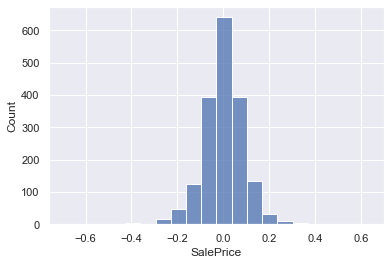

In [233]:
it_lasso3b = regx2(model= Lasso(max_iter=3000),
x_train = model_vars_data[keeps],
x_test = test_vars_data[keeps],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [107]:
keeps = to_keep(it_lasso3,0.0007)
keeps

['bc_GrLivArea',
 'OverallQual',
 'YearBuilt',
 'OverallCond',
 'BsmtFinSF1',
 'log_LotArea',
 'Neighborhood_Somerst',
 'GarageType_No',
 'GarageCond',
 'Condition1_Norm',
 'Condition2_PosN',
 'Functional',
 'Exterior1st_BrkFace',
 'MSSubClass_160',
 'Neighborhood_StoneBr',
 'Neighborhood_Crawfor',
 'Neighborhood_NridgHt',
 'log_BsmtFinSF1',
 'Fireplaces',
 'yeo_TotalBsmtSF',
 'BsmtFinType1',
 'GarageCars',
 'Neighborhood_GrnHill',
 'SaleCondition_Partial',
 'Neighborhood_NoRidge',
 'MSZoning_RL',
 'BsmtExposure',
 'yeo_GarageArea',
 'MSSubClass_60',
 'KitchenQual',
 'MSZoning_C (all)',
 'BsmtFinSF2',
 'BsmtQual',
 'TotRmsAbvGrd',
 'Neighborhood_BrkSide',
 'ExterQual',
 'Neighborhood_Edwards',
 'YearRemodAdd',
 'MSSubClass_90',
 'SaleCondition_Normal',
 'Condition1_PosN',
 'log_LotFrontage',
 'RoofMatl_WdShngl',
 'HeatingQC',
 'Neighborhood_BrDale',
 'Exterior2nd_VinylSd',
 'Neighborhood_NPkVill',
 'BsmtFullBath',
 'SaleCondition_Alloca',
 'CentralAir_Y',
 'FullBath',
 'RoofStyle_Gambr

best params:  {'alpha': 0.0001}
score:  0.9488446514006325
  
test score:  -5.1131595115922455
adj_r2:  0.9445765881021257
  
adj_r2_test:  -6.453426344575403
 
train RMSE: 0.08672842862029727
  
test RMSE: 0.9790312729597972
                  features      coef   abs_val
0             bc_GrLivArea  0.136036  0.136036
1              OverallQual  0.063031  0.063031
2                YearBuilt  0.060704  0.060704
3              OverallCond  0.048606  0.048606
4               BsmtFinSF1  0.041911  0.041911
5              log_LotArea  0.033531  0.033531
6     Neighborhood_Somerst  0.025526  0.025526
7            GarageType_No  0.024525  0.024525
8               GarageCond  0.024267  0.024267
9          Condition1_Norm  0.021725  0.021725
10         Condition2_PosN -0.021333  0.021333
11              Functional  0.018964  0.018964
12     Exterior1st_BrkFace  0.018738  0.018738
13          MSSubClass_160 -0.018351  0.018351
14    Neighborhood_StoneBr  0.017443  0.017443
15    Neighborhood_Cra

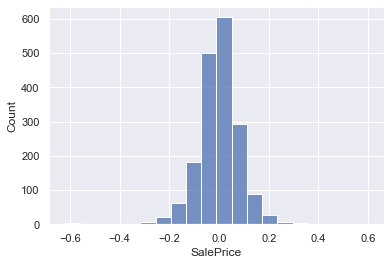

In [108]:
it_lasso4 = regx2(model= Lasso(max_iter=3000),
x_train = model_vars_data[keeps],
x_test = test_vars_data[keeps],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [110]:
keeps = to_keep(it_lasso4,0.0008)
keeps

['bc_GrLivArea',
 'OverallQual',
 'YearBuilt',
 'OverallCond',
 'BsmtFinSF1',
 'log_LotArea',
 'Neighborhood_Somerst',
 'GarageType_No',
 'GarageCond',
 'Condition1_Norm',
 'Condition2_PosN',
 'Functional',
 'Exterior1st_BrkFace',
 'MSSubClass_160',
 'Neighborhood_StoneBr',
 'Neighborhood_Crawfor',
 'log_BsmtFinSF1',
 'Neighborhood_NridgHt',
 'Fireplaces',
 'yeo_TotalBsmtSF',
 'BsmtFinType1',
 'GarageCars',
 'Neighborhood_GrnHill',
 'SaleCondition_Partial',
 'Neighborhood_NoRidge',
 'MSZoning_RL',
 'BsmtExposure',
 'yeo_GarageArea',
 'MSSubClass_60',
 'KitchenQual',
 'MSZoning_C (all)',
 'BsmtFinSF2',
 'BsmtQual',
 'TotRmsAbvGrd',
 'Neighborhood_BrkSide',
 'ExterQual',
 'Neighborhood_Edwards',
 'MSSubClass_90',
 'YearRemodAdd',
 'SaleCondition_Normal',
 'Condition1_PosN',
 'log_LotFrontage',
 'RoofMatl_WdShngl',
 'HeatingQC',
 'Neighborhood_BrDale',
 'Neighborhood_NPkVill',
 'BsmtFullBath',
 'SaleCondition_Alloca',
 'Exterior2nd_VinylSd',
 'CentralAir_Y',
 'FullBath',
 'RoofStyle_Gambr

best params:  {'alpha': 0.0001}
score:  0.9488446392592721
  
test score:  -5.112084927388585
adj_r2:  0.9445765749477708
  
adj_r2_test:  -6.4521161654122645
 
train RMSE: 0.08672843891248636
  
test RMSE: 0.9789452210764915
                  features      coef   abs_val
0             bc_GrLivArea  0.136024  0.136024
1              OverallQual  0.063032  0.063032
2                YearBuilt  0.060692  0.060692
3              OverallCond  0.048606  0.048606
4               BsmtFinSF1  0.041915  0.041915
5              log_LotArea  0.033528  0.033528
6     Neighborhood_Somerst  0.025527  0.025527
7            GarageType_No  0.024522  0.024522
8               GarageCond  0.024266  0.024266
9          Condition1_Norm  0.021725  0.021725
10         Condition2_PosN -0.021332  0.021332
11              Functional  0.018964  0.018964
12     Exterior1st_BrkFace  0.018737  0.018737
13          MSSubClass_160 -0.018346  0.018346
14    Neighborhood_StoneBr  0.017443  0.017443
15    Neighborhood_Cra

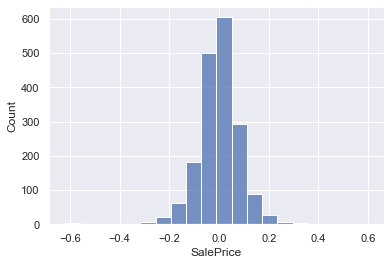

In [111]:
it_lasso5 = regx2(model= Lasso(max_iter=3000),
x_train = model_vars_data[keeps],
x_test = test_vars_data[keeps],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [112]:
keeps = to_keep(it_lasso5,0.001)
keeps

['bc_GrLivArea',
 'OverallQual',
 'YearBuilt',
 'OverallCond',
 'BsmtFinSF1',
 'log_LotArea',
 'Neighborhood_Somerst',
 'GarageType_No',
 'GarageCond',
 'Condition1_Norm',
 'Condition2_PosN',
 'Functional',
 'Exterior1st_BrkFace',
 'MSSubClass_160',
 'Neighborhood_StoneBr',
 'Neighborhood_Crawfor',
 'log_BsmtFinSF1',
 'Neighborhood_NridgHt',
 'Fireplaces',
 'yeo_TotalBsmtSF',
 'BsmtFinType1',
 'GarageCars',
 'Neighborhood_GrnHill',
 'SaleCondition_Partial',
 'Neighborhood_NoRidge',
 'MSZoning_RL',
 'BsmtExposure',
 'yeo_GarageArea',
 'MSSubClass_60',
 'KitchenQual',
 'MSZoning_C (all)',
 'BsmtFinSF2',
 'BsmtQual',
 'TotRmsAbvGrd',
 'Neighborhood_BrkSide',
 'ExterQual',
 'Neighborhood_Edwards',
 'MSSubClass_90',
 'YearRemodAdd',
 'SaleCondition_Normal',
 'Condition1_PosN',
 'log_LotFrontage',
 'RoofMatl_WdShngl',
 'HeatingQC',
 'Neighborhood_BrDale',
 'Neighborhood_NPkVill',
 'BsmtFullBath',
 'SaleCondition_Alloca',
 'Exterior2nd_VinylSd',
 'CentralAir_Y',
 'FullBath',
 'RoofStyle_Gambr

best params:  {'alpha': 0.0001}
score:  0.9488205341024981
  
test score:  -5.09884921316881
adj_r2:  0.944683271889227
  
adj_r2_test:  -6.389358059215502
 
train RMSE: 0.08674887036252239
  
test RMSE: 0.9778846941403943
                  features      coef   abs_val
0             bc_GrLivArea  0.135899  0.135899
1              OverallQual  0.063202  0.063202
2                YearBuilt  0.060733  0.060733
3              OverallCond  0.048553  0.048553
4               BsmtFinSF1  0.041818  0.041818
5              log_LotArea  0.033650  0.033650
6     Neighborhood_Somerst  0.025291  0.025291
7            GarageType_No  0.024548  0.024548
8               GarageCond  0.024161  0.024161
9          Condition1_Norm  0.021843  0.021843
10         Condition2_PosN -0.021371  0.021371
11              Functional  0.018955  0.018955
12     Exterior1st_BrkFace  0.018712  0.018712
13          MSSubClass_160 -0.018234  0.018234
14    Neighborhood_StoneBr  0.017263  0.017263
15    Neighborhood_Crawfo

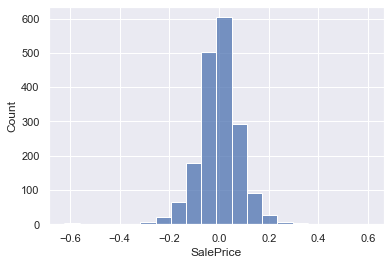

In [113]:
it_lasso6 = regx2(model= Lasso(max_iter=3000),
x_train = model_vars_data[keeps],
x_test = test_vars_data[keeps],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [114]:
keeps = to_keep(it_lasso6,0.002)
keeps

['bc_GrLivArea',
 'OverallQual',
 'YearBuilt',
 'OverallCond',
 'BsmtFinSF1',
 'log_LotArea',
 'Neighborhood_Somerst',
 'GarageType_No',
 'GarageCond',
 'Condition1_Norm',
 'Condition2_PosN',
 'Functional',
 'Exterior1st_BrkFace',
 'MSSubClass_160',
 'Neighborhood_StoneBr',
 'Neighborhood_Crawfor',
 'log_BsmtFinSF1',
 'Neighborhood_NridgHt',
 'Fireplaces',
 'BsmtFinType1',
 'yeo_TotalBsmtSF',
 'GarageCars',
 'Neighborhood_GrnHill',
 'SaleCondition_Partial',
 'Neighborhood_NoRidge',
 'MSZoning_RL',
 'BsmtExposure',
 'MSSubClass_60',
 'yeo_GarageArea',
 'KitchenQual',
 'MSZoning_C (all)',
 'BsmtQual',
 'BsmtFinSF2',
 'TotRmsAbvGrd',
 'Neighborhood_BrkSide',
 'ExterQual',
 'MSSubClass_90',
 'Neighborhood_Edwards',
 'YearRemodAdd',
 'Condition1_PosN',
 'SaleCondition_Normal',
 'log_LotFrontage',
 'RoofMatl_WdShngl',
 'HeatingQC',
 'Neighborhood_BrDale',
 'Neighborhood_NPkVill',
 'BsmtFullBath',
 'SaleCondition_Alloca',
 'Exterior2nd_VinylSd',
 'CentralAir_Y',
 'FullBath',
 'RoofStyle_Gambr

best params:  {'alpha': 0.0001}
score:  0.9486895480861707
  
test score:  -5.034178613555249
adj_r2:  0.9448718061282965
  
adj_r2_test:  -6.198179117713283
 
train RMSE: 0.08685980965863739
  
test RMSE: 0.9726862601235172
                  features      coef   abs_val
0             bc_GrLivArea  0.135180  0.135180
1              OverallQual  0.063086  0.063086
2                YearBuilt  0.060944  0.060944
3              OverallCond  0.048811  0.048811
4               BsmtFinSF1  0.042340  0.042340
5              log_LotArea  0.033451  0.033451
6     Neighborhood_Somerst  0.026324  0.026324
7            GarageType_No  0.024569  0.024569
8               GarageCond  0.024533  0.024533
9          Condition1_Norm  0.021829  0.021829
10         Condition2_PosN -0.021427  0.021427
12     Exterior1st_BrkFace  0.019184  0.019184
11              Functional  0.019103  0.019103
13          MSSubClass_160 -0.018349  0.018349
14    Neighborhood_StoneBr  0.017473  0.017473
17    Neighborhood_Nrid

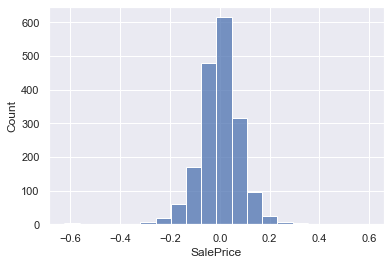

In [115]:
it_lasso7 = regx2(model= Lasso(max_iter=3000),
x_train = model_vars_data[keeps],
x_test = test_vars_data[keeps],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [117]:
keeps = to_keep(it_lasso7,0.003)
type(keeps)

list

best params:  {'alpha': 0.0001}
score:  0.947999299967509
  
test score:  -5.207957150980945
adj_r2:  0.944754994962539
  
adj_r2_test:  -6.194529052036387
 
train RMSE: 0.0874420938622285
  
test RMSE: 0.9865930593393267
                  features      coef   abs_val
0             bc_GrLivArea  0.137168  0.137168
1              OverallQual  0.063956  0.063956
2                YearBuilt  0.056682  0.056682
3              OverallCond  0.047549  0.047549
4               BsmtFinSF1  0.041452  0.041452
5              log_LotArea  0.032065  0.032065
6     Neighborhood_Somerst  0.025695  0.025695
7            GarageType_No  0.025544  0.025544
8               GarageCond  0.024464  0.024464
9          Condition1_Norm  0.022015  0.022015
10         Condition2_PosN -0.020991  0.020991
13          MSSubClass_160 -0.019614  0.019614
11     Exterior1st_BrkFace  0.019275  0.019275
12              Functional  0.018731  0.018731
14    Neighborhood_StoneBr  0.017868  0.017868
17    Neighborhood_Crawfor

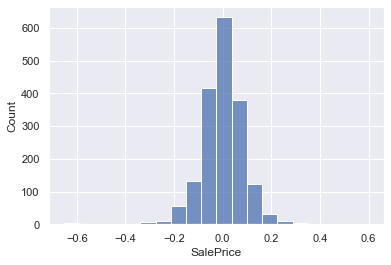

In [118]:
it_lasso8 = regx2(model= Lasso(max_iter=3000),
x_train = model_vars_data[keeps],
x_test = test_vars_data[keeps],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [122]:
keeps = to_keep(it_lasso8,0.004)
type(keeps)

list

best params:  {'alpha': 0.0001}
score:  0.946869844756997
  
test score:  -5.385795880943417
adj_r2:  0.9441793188512104
  
adj_r2_test:  -6.195656291500382
 
train RMSE: 0.08838661381377069
  
test RMSE: 1.0006246947184898
                 features      coef   abs_val
0            bc_GrLivArea  0.138995  0.138995
1             OverallQual  0.064412  0.064412
2               YearBuilt  0.058955  0.058955
3             OverallCond  0.048415  0.048415
4              BsmtFinSF1  0.041531  0.041531
5             log_LotArea  0.032882  0.032882
6    Neighborhood_Somerst  0.027842  0.027842
7           GarageType_No  0.026413  0.026413
8              GarageCond  0.026127  0.026127
9         Condition1_Norm  0.022032  0.022032
10        Condition2_PosN -0.021280  0.021280
11         MSSubClass_160 -0.020454  0.020454
12    Exterior1st_BrkFace  0.019332  0.019332
26            MSZoning_RL  0.018504  0.018504
13             Functional  0.018222  0.018222
18        yeo_TotalBsmtSF  0.018204  0.0

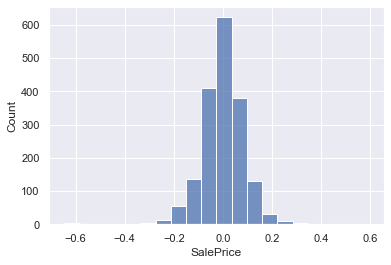

In [123]:
it_lasso9 = regx2(model= Lasso(max_iter=3000),
x_train = model_vars_data[keeps],
x_test = test_vars_data[keeps],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [124]:
keeps = to_keep(it_lasso9,0.005)
type(keeps)

list

best params:  {'alpha': 0.0001}
score:  0.945980185416104
  
test score:  -5.508992200215025
adj_r2:  0.9435403790828417
  
adj_r2_test:  -6.239497799663618
 
train RMSE: 0.08912355429669987
  
test RMSE: 1.0102307324057478
                 features      coef   abs_val
0            bc_GrLivArea  0.140440  0.140440
1             OverallQual  0.065774  0.065774
2               YearBuilt  0.059444  0.059444
3             OverallCond  0.048824  0.048824
4              BsmtFinSF1  0.042148  0.042148
5             log_LotArea  0.031006  0.031006
6    Neighborhood_Somerst  0.029449  0.029449
8              GarageCond  0.025368  0.025368
7           GarageType_No  0.025314  0.025314
10        Condition2_PosN -0.021900  0.021900
9         Condition1_Norm  0.021878  0.021878
11         MSSubClass_160 -0.020056  0.020056
13            MSZoning_RL  0.019760  0.019760
14             Functional  0.018348  0.018348
18   Neighborhood_Crawfor  0.018161  0.018161
17             Fireplaces  0.018043  0.0

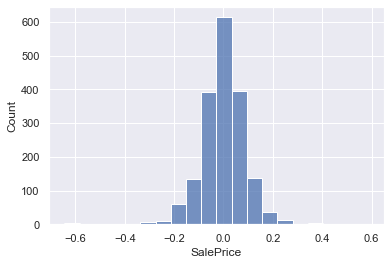

In [125]:
it_lasso10 = regx2(model= Lasso(max_iter=3000),
x_train = model_vars_data[keeps],
x_test = test_vars_data[keeps],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [126]:
keeps = to_keep(it_lasso10,0.006)
type(keeps)

list

best params:  {'alpha': 0.0001}
score:  0.9444999448901271
  
test score:  -5.683270255174639
adj_r2:  0.9423604145723127
  
adj_r2_test:  -6.31751828222379
 
train RMSE: 0.09033637528534773
  
test RMSE: 1.0236658428340277
                 features      coef   abs_val
0            bc_GrLivArea  0.142398  0.142398
1             OverallQual  0.064669  0.064669
2               YearBuilt  0.064410  0.064410
3             OverallCond  0.048331  0.048331
4              BsmtFinSF1  0.042498  0.042498
5             log_LotArea  0.033092  0.033092
6    Neighborhood_Somerst  0.029699  0.029699
8           GarageType_No  0.023902  0.023902
7              GarageCond  0.023589  0.023589
10        Condition1_Norm  0.023296  0.023296
9         Condition2_PosN -0.022203  0.022203
15             Fireplaces  0.019288  0.019288
12            MSZoning_RL  0.018909  0.018909
14   Neighborhood_Crawfor  0.018836  0.018836
18   Neighborhood_StoneBr  0.018260  0.018260
13             Functional  0.018170  0.0

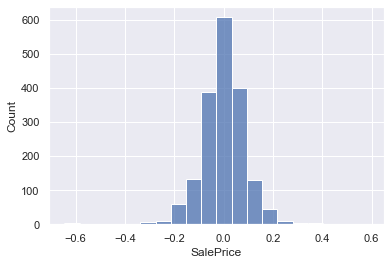

In [127]:
it_lasso11 = regx2(model= Lasso(max_iter=3000),
x_train = model_vars_data[keeps],
x_test = test_vars_data[keeps],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [128]:
keeps = to_keep(it_lasso11,0.008)
type(keeps)

list

best params:  {'alpha': 0.0001}
score:  0.9407128548371132
  
test score:  -5.9304646867050534
adj_r2:  0.939058486891224
  
adj_r2_test:  -6.39951547351244
 
train RMSE: 0.09336760584779058
  
test RMSE: 1.0424251433833582
                 features      coef   abs_val
0            bc_GrLivArea  0.144916  0.144916
2               YearBuilt  0.072346  0.072346
1             OverallQual  0.063786  0.063786
3             OverallCond  0.051854  0.051854
4              BsmtFinSF1  0.043188  0.043188
5             log_LotArea  0.032835  0.032835
6    Neighborhood_Somerst  0.028788  0.028788
10        Condition2_PosN -0.022708  0.022708
9         Condition1_Norm  0.021946  0.021946
8              GarageCond  0.021386  0.021386
11             Fireplaces  0.020823  0.020823
7           GarageType_No  0.020760  0.020760
14   Neighborhood_StoneBr  0.018773  0.018773
12            MSZoning_RL  0.018382  0.018382
13   Neighborhood_Crawfor  0.017964  0.017964
18        yeo_TotalBsmtSF  0.017456  0.0

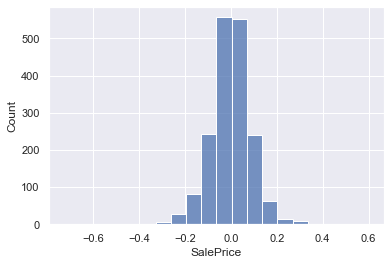

In [129]:
it_lasso12 = regx2(model= Lasso(max_iter=3000),
x_train = model_vars_data[keeps],
x_test = test_vars_data[keeps],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [139]:
keeps = to_keep(it_lasso12,0.01)
keeps

['bc_GrLivArea',
 'YearBuilt',
 'OverallQual',
 'OverallCond',
 'BsmtFinSF1',
 'log_LotArea',
 'Neighborhood_Somerst',
 'Condition2_PosN',
 'Condition1_Norm',
 'GarageCond',
 'Fireplaces',
 'GarageType_No',
 'Neighborhood_StoneBr',
 'MSZoning_RL',
 'Neighborhood_Crawfor',
 'yeo_TotalBsmtSF',
 'MSSubClass_160',
 'KitchenAbvGr',
 'Functional',
 'Neighborhood_NridgHt',
 'SaleCondition_Partial',
 'Neighborhood_GrnHill',
 'BsmtExposure',
 'yeo_GarageArea',
 'GarageCars',
 'Exterior1st_BrkFace',
 'MSSubClass_60',
 'Neighborhood_NoRidge',
 'BsmtFinSF2',
 'KitchenQual',
 'log_BsmtFinSF1',
 'SaleCondition_Normal',
 'MSZoning_C (all)',
 'BsmtQual',
 'TotRmsAbvGrd',
 'ExterQual',
 'HeatingQC',
 'Neighborhood_Edwards',
 'YearRemodAdd']

best params:  {'alpha': 0.0001}
score:  0.9378312864273026
  
test score:  -5.446068991385849
adj_r2:  0.9364583646666371
  
adj_r2_test:  -5.788571294742864
 
train RMSE: 0.0956096864398275
  
test RMSE: 1.0053358629834694
                 features      coef   abs_val
0            bc_GrLivArea  0.139757  0.139757
1               YearBuilt  0.070359  0.070359
2             OverallQual  0.067445  0.067445
3             OverallCond  0.050777  0.050777
4              BsmtFinSF1  0.049165  0.049165
5             log_LotArea  0.033835  0.033835
6    Neighborhood_Somerst  0.028267  0.028267
9              GarageCond  0.022422  0.022422
11          GarageType_No  0.022379  0.022379
10             Fireplaces  0.021452  0.021452
7         Condition2_PosN -0.020315  0.020315
8         Condition1_Norm  0.018546  0.018546
13            MSZoning_RL  0.018467  0.018467
15        yeo_TotalBsmtSF  0.017513  0.017513
19   Neighborhood_NridgHt  0.017471  0.017471
16         MSSubClass_160 -0.017422  0.0

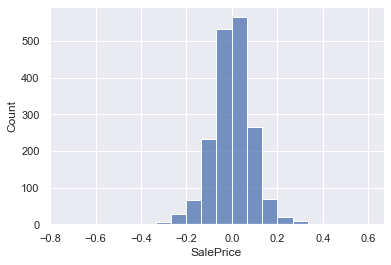

In [140]:
it_lasso13 = regx2(model= Lasso(max_iter=3000),
x_train = model_vars_data[keeps],
x_test = test_vars_data[keeps],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [142]:
keeps = to_keep(it_lasso13,0.015)
type(keeps)
keeps

['bc_GrLivArea',
 'YearBuilt',
 'OverallQual',
 'OverallCond',
 'BsmtFinSF1',
 'log_LotArea',
 'Neighborhood_Somerst',
 'GarageCond',
 'GarageType_No',
 'Fireplaces',
 'Condition2_PosN',
 'Condition1_Norm',
 'MSZoning_RL',
 'yeo_TotalBsmtSF',
 'Neighborhood_NridgHt',
 'MSSubClass_160',
 'Neighborhood_StoneBr',
 'KitchenAbvGr',
 'SaleCondition_Partial',
 'Neighborhood_Crawfor',
 'Functional',
 'GarageCars',
 'BsmtExposure',
 'Neighborhood_GrnHill',
 'yeo_GarageArea']

best params:  {'alpha': 0.001}
score:  0.927434648265433
  
test score:  -6.172464343839514
adj_r2:  0.9264154719770261
  
adj_r2_test:  -6.412185745705808
 
train RMSE: 0.10329531059028293
  
test RMSE: 1.0604688093937626
                 features      coef   abs_val
0            bc_GrLivArea  0.146664  0.146664
1               YearBuilt  0.088415  0.088415
2             OverallQual  0.088377  0.088377
3             OverallCond  0.060504  0.060504
4              BsmtFinSF1  0.039800  0.039800
13        yeo_TotalBsmtSF  0.034510  0.034510
5             log_LotArea  0.031758  0.031758
6    Neighborhood_Somerst  0.027441  0.027441
9              Fireplaces  0.021322  0.021322
21             GarageCars  0.021040  0.021040
10        Condition2_PosN -0.020185  0.020185
17           KitchenAbvGr -0.018853  0.018853
19   Neighborhood_Crawfor  0.018054  0.018054
14   Neighborhood_NridgHt  0.018024  0.018024
11        Condition1_Norm  0.017917  0.017917
15         MSSubClass_160 -0.017214  0.01

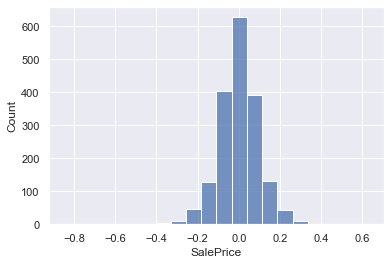

In [133]:
it_lasso14 = regx2(model= Lasso(max_iter=3000),
x_train = model_vars_data[keeps],
x_test = test_vars_data[keeps],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [143]:
keeps = to_keep(it_lasso14,0.017)
type(keeps)
keeps

['bc_GrLivArea',
 'YearBuilt',
 'OverallQual',
 'OverallCond',
 'BsmtFinSF1',
 'yeo_TotalBsmtSF',
 'log_LotArea',
 'Neighborhood_Somerst',
 'Fireplaces',
 'GarageCars',
 'Condition2_PosN',
 'KitchenAbvGr',
 'Neighborhood_Crawfor',
 'Neighborhood_NridgHt',
 'Condition1_Norm',
 'MSSubClass_160']

best params:  {'alpha': 0.001}
score:  0.9187630788564088
  
test score:  -5.384692355130798
adj_r2:  0.9180365328875449
  
adj_r2_test:  -5.519639617590629
 
train RMSE: 0.10929308406484632
  
test RMSE: 1.0005382322861809
                features      coef   abs_val
0           bc_GrLivArea  0.138030  0.138030
1              YearBuilt  0.101758  0.101758
2            OverallQual  0.100334  0.100334
3            OverallCond  0.062444  0.062444
4             BsmtFinSF1  0.045323  0.045323
6            log_LotArea  0.038882  0.038882
5        yeo_TotalBsmtSF  0.038617  0.038617
9             GarageCars  0.032350  0.032350
8             Fireplaces  0.022370  0.022370
7   Neighborhood_Somerst  0.020367  0.020367
15        MSSubClass_160 -0.019916  0.019916
10       Condition2_PosN -0.019545  0.019545
14       Condition1_Norm  0.018275  0.018275
11          KitchenAbvGr -0.018092  0.018092
12  Neighborhood_Crawfor  0.017836  0.017836
13  Neighborhood_NridgHt  0.016659  0.016659
 
skewness:

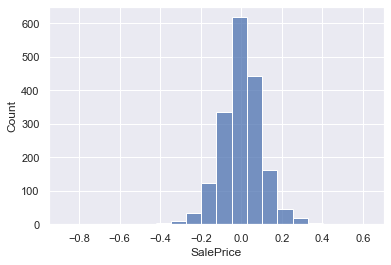

In [144]:
it_lasso15 = regx2(model= Lasso(max_iter=3000),
x_train = model_vars_data[keeps],
x_test = test_vars_data[keeps],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [145]:
keeps = to_keep(it_lasso15,0.019)
type(keeps)
keeps

['bc_GrLivArea',
 'YearBuilt',
 'OverallQual',
 'OverallCond',
 'BsmtFinSF1',
 'log_LotArea',
 'yeo_TotalBsmtSF',
 'GarageCars',
 'Fireplaces',
 'Neighborhood_Somerst',
 'MSSubClass_160',
 'Condition2_PosN']

best params:  {'alpha': 0.001}
score:  0.9100495490641333
  
test score:  -4.7729121380770065
adj_r2:  0.9094475382380148
  
adj_r2_test:  -4.863943604117643
 
train RMSE: 0.11500523928352736
  
test RMSE: 0.9513956785470674
                features      coef   abs_val
0           bc_GrLivArea  0.130498  0.130498
2            OverallQual  0.112101  0.112101
1              YearBuilt  0.103827  0.103827
3            OverallCond  0.064088  0.064088
4             BsmtFinSF1  0.045861  0.045861
6        yeo_TotalBsmtSF  0.041955  0.041955
5            log_LotArea  0.040011  0.040011
7             GarageCars  0.030467  0.030467
8             Fireplaces  0.028658  0.028658
11       Condition2_PosN -0.022080  0.022080
9   Neighborhood_Somerst  0.017617  0.017617
10        MSSubClass_160 -0.016694  0.016694
 
skewness:  -0.5390682274839236
 
model_importances.shape:  (12, 3)


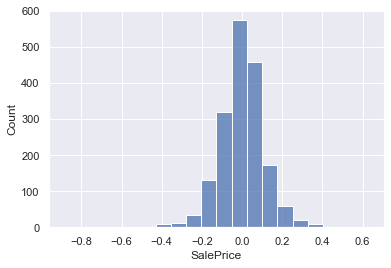

In [146]:
it_lasso16 = regx2(model= Lasso(max_iter=3000),
x_train = model_vars_data[keeps],
x_test = test_vars_data[keeps],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [147]:
keeps = to_keep(it_lasso16,0.03)
type(keeps)
keeps

['bc_GrLivArea',
 'OverallQual',
 'YearBuilt',
 'OverallCond',
 'BsmtFinSF1',
 'yeo_TotalBsmtSF',
 'log_LotArea',
 'GarageCars']

best params:  {'alpha': 0.0001}
score:  0.8997854292556249
  
test score:  -5.178742182119576
adj_r2:  0.8993392875939916
  
adj_r2_test:  -5.243356479448931
 
train RMSE: 0.12138957440301378
  
test RMSE: 0.9842688425475362
          features      coef   abs_val
0     bc_GrLivArea  0.135258  0.135258
1      OverallQual  0.119581  0.119581
2        YearBuilt  0.105552  0.105552
3      OverallCond  0.065399  0.065399
6      log_LotArea  0.050758  0.050758
4       BsmtFinSF1  0.046291  0.046291
5  yeo_TotalBsmtSF  0.042691  0.042691
7       GarageCars  0.032874  0.032874
 
skewness:  -1.3258034381088515
 
model_importances.shape:  (8, 3)


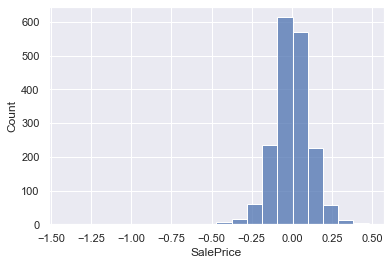

In [148]:
it_lasso17 = regx2(model= Lasso(max_iter=3000),
x_train = model_vars_data[keeps],
x_test = test_vars_data[keeps],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [149]:
keeps = to_keep(it_lasso17,0.03)
type(keeps)
keeps

['bc_GrLivArea',
 'OverallQual',
 'YearBuilt',
 'OverallCond',
 'log_LotArea',
 'BsmtFinSF1',
 'yeo_TotalBsmtSF',
 'GarageCars']

best params:  {'alpha': 0.0001}
score:  0.8997854413397169
  
test score:  -5.179216790317212
adj_r2:  0.8993392997318804
  
adj_r2_test:  -5.243836050869549
 
train RMSE: 0.12138956708430339
  
test RMSE: 0.9843066441807222
          features      coef   abs_val
0     bc_GrLivArea  0.135263  0.135263
1      OverallQual  0.119578  0.119578
2        YearBuilt  0.105560  0.105560
3      OverallCond  0.065400  0.065400
4      log_LotArea  0.050761  0.050761
5       BsmtFinSF1  0.046293  0.046293
6  yeo_TotalBsmtSF  0.042689  0.042689
7       GarageCars  0.032869  0.032869
 
skewness:  -1.3258187879206416
 
model_importances.shape:  (8, 3)


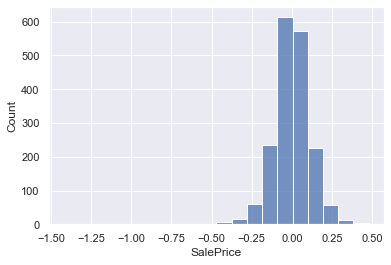

In [150]:
it_lasso18 = regx2(model= Lasso(max_iter=3000),
x_train = model_vars_data[keeps],
x_test = test_vars_data[keeps],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [151]:
keeps = to_keep(it_lasso18,0.04)
type(keeps)
keeps

['bc_GrLivArea',
 'OverallQual',
 'YearBuilt',
 'OverallCond',
 'log_LotArea',
 'BsmtFinSF1',
 'yeo_TotalBsmtSF']

best params:  {'alpha': 0.0001}
score:  0.8959683111193468
  
test score:  -5.784680831706011
adj_r2:  0.8955632934207014
  
adj_r2_test:  -5.8466818314735605
 
train RMSE: 0.12367980105373996
  
test RMSE: 1.0314030507458554
          features      coef   abs_val
0     bc_GrLivArea  0.142130  0.142130
1      OverallQual  0.127112  0.127112
2        YearBuilt  0.116161  0.116161
3      OverallCond  0.065358  0.065358
4      log_LotArea  0.055494  0.055494
5       BsmtFinSF1  0.047834  0.047834
6  yeo_TotalBsmtSF  0.043958  0.043958
 
skewness:  -1.328807494422086
 
model_importances.shape:  (7, 3)


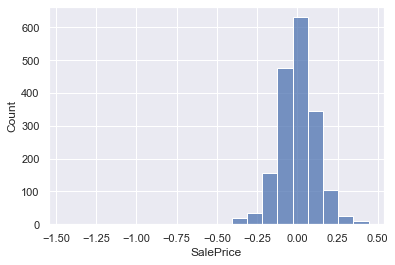

In [152]:
it_lasso19 = regx2(model= Lasso(max_iter=3000),
x_train = model_vars_data[keeps],
x_test = test_vars_data[keeps],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [153]:
keeps = to_keep(it_lasso19,0.044)
type(keeps)
keeps

['bc_GrLivArea',
 'OverallQual',
 'YearBuilt',
 'OverallCond',
 'log_LotArea',
 'BsmtFinSF1']

best params:  {'alpha': 0.0001}
score:  0.8890028803696532
  
test score:  -5.800159671902632
adj_r2:  0.8886326843064059
  
adj_r2_test:  -5.85335518432951
 
train RMSE: 0.12775320609189084
  
test RMSE: 1.032578922390862
       features      coef   abs_val
0  bc_GrLivArea  0.145030  0.145030
1   OverallQual  0.142107  0.142107
2     YearBuilt  0.117988  0.117988
5    BsmtFinSF1  0.063785  0.063785
4   log_LotArea  0.062664  0.062664
3   OverallCond  0.062319  0.062319
 
skewness:  -1.1781788768115449
 
model_importances.shape:  (6, 3)


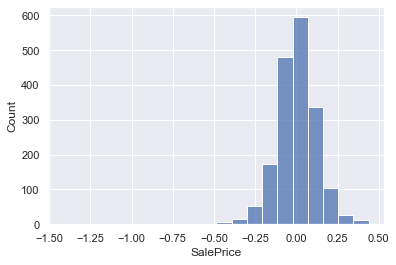

In [154]:
it_lasso20 = regx2(model= Lasso(max_iter=3000),
x_train = model_vars_data[keeps],
x_test = test_vars_data[keeps],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [155]:
keeps = to_keep(it_lasso20,0.06234)
type(keeps)
keeps

['bc_GrLivArea', 'OverallQual', 'YearBuilt', 'BsmtFinSF1', 'log_LotArea']

best params:  {'alpha': 0.001}
score:  0.8680788719462552
  
test score:  -4.9675598756791555
adj_r2:  0.8677124243683282
  
adj_r2_test:  -5.006411176953108
 
train RMSE: 0.13927498861447202
  
test RMSE: 0.967302016577609
       features      coef   abs_val
1   OverallQual  0.160005  0.160005
0  bc_GrLivArea  0.135262  0.135262
2     YearBuilt  0.083147  0.083147
3    BsmtFinSF1  0.066243  0.066243
4   log_LotArea  0.060041  0.060041
 
skewness:  -1.2998029279429502
 
model_importances.shape:  (5, 3)


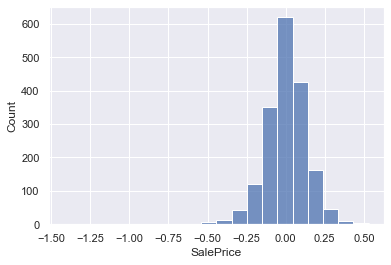

In [156]:
it_lasso21 = regx2(model= Lasso(max_iter=3000),
x_train = model_vars_data[keeps],
x_test = test_vars_data[keeps],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [157]:
keeps = to_keep(it_lasso21,0.064)
type(keeps)
keeps

['OverallQual', 'bc_GrLivArea', 'YearBuilt', 'BsmtFinSF1']

best params:  {'alpha': 0.001}
score:  0.8470923209225326
  
test score:  -7.381990311452437
adj_r2:  0.846752714750234
  
adj_r2_test:  -7.425589740900826
 
train RMSE: 0.14994452116819923
  
test RMSE: 1.1464029047864792
       features      coef   abs_val
1  bc_GrLivArea  0.161080  0.161080
0   OverallQual  0.152065  0.152065
2     YearBuilt  0.078610  0.078610
3    BsmtFinSF1  0.075692  0.075692
 
skewness:  -0.9811487181611099
 
model_importances.shape:  (4, 3)


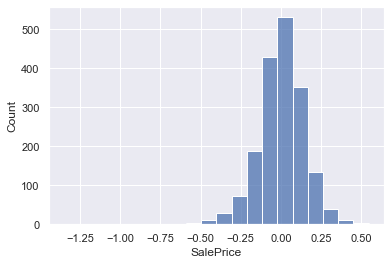

In [158]:
it_lasso22 = regx2(model= Lasso(max_iter=3000),
x_train = model_vars_data[keeps],
x_test = test_vars_data[keeps],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [159]:
# keeps = to_keep(it_lasso21,0.064)
# type(keeps)
keeps = ['OverallQual', 'bc_GrLivArea', 'YearBuilt']

best params:  {'alpha': 0.001}
score:  0.8120396183812654
  
test score:  -7.693220092438553
adj_r2:  0.8117266987670277
  
adj_r2_test:  -7.727089781110392
 
train RMSE: 0.1662451991464764
  
test RMSE: 1.1674923354484323
       features      coef   abs_val
1  bc_GrLivArea  0.163074  0.163074
0   OverallQual  0.162373  0.162373
2     YearBuilt  0.096210  0.096210
 
skewness:  -0.5553580086208882
 
model_importances.shape:  (3, 3)


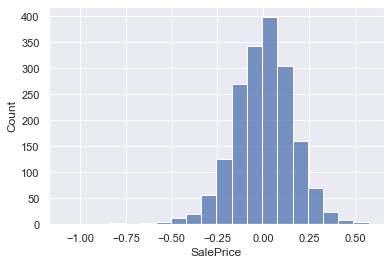

In [160]:
it_lasso23 = regx2(model= Lasso(max_iter=3000),
x_train = model_vars_data[keeps],
x_test = test_vars_data[keeps],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [162]:
sfs = ['bc_GrLivArea' , 'log_LotArea', 'log_MasVnrArea', 'yeo_TotalBsmtSF','yeo_GarageArea','log_LotFrontage','log_OpenPorchSF']

best params:  {'alpha': 0.001}
score:  0.7553330581331563
  
test score:  -8.558826364947366
adj_r2:  0.7543805172026402
  
adj_r2_test:  -8.646178564104849
 
train RMSE: 0.18967216450812618
  
test RMSE: 1.2242383698336323
          features      coef   abs_val
0     bc_GrLivArea  0.163621  0.163621
3  yeo_TotalBsmtSF  0.111104  0.111104
4   yeo_GarageArea  0.096321  0.096321
6  log_OpenPorchSF  0.041889  0.041889
2   log_MasVnrArea  0.027685  0.027685
1      log_LotArea  0.011048  0.011048
5  log_LotFrontage  0.000771  0.000771
 
skewness:  -0.9477432444958886
 
model_importances.shape:  (7, 3)


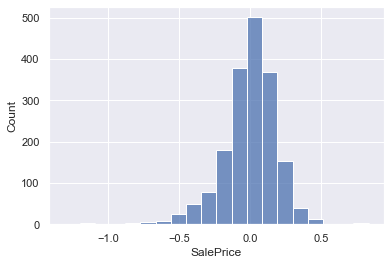

In [163]:
it_lasso24 = regx2(model= Lasso(max_iter=3000),
x_train = model_vars_data[sfs],
x_test = test_vars_data[sfs],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [166]:
ridge_keep = to_keep(it1_lasso,0.000053)

best params:  {'alpha': 10}
score:  0.9488206187189931
  
test score:  -4.4800441599932785
adj_r2:  0.9442493764561151
  
adj_r2_test:  -5.777718617079686
 
train RMSE: 0.08674879865028133
  
test RMSE: 0.9269487639243295
                  features      coef   abs_val
0             bc_GrLivArea  0.128593  0.128593
1              OverallQual  0.062638  0.062638
2                YearBuilt  0.056734  0.056734
3              OverallCond  0.047919  0.047919
4               BsmtFinSF1  0.041059  0.041059
5              log_LotArea  0.033139  0.033139
6     Neighborhood_Somerst  0.024479  0.024479
38           GarageType_No  0.023696  0.023696
43              GarageCond  0.023653  0.023653
7          Condition1_Norm  0.021489  0.021489
8          Condition2_PosN -0.021059  0.021059
9               Functional  0.019021  0.019021
15     Exterior1st_BrkFace  0.018821  0.018821
11    Neighborhood_Crawfor  0.017475  0.017475
13    Neighborhood_StoneBr  0.017438  0.017438
24          MSSubClass_160

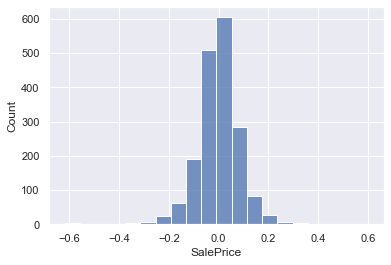

In [167]:
it_ridge1 = regx2(model= Ridge(max_iter=3000),
x_train = model_vars_data[ridge_keep],
x_test = test_vars_data[ridge_keep],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [168]:
ridge_keep = to_keep(it_ridge1,0.001)

best params:  {'alpha': 10}
score:  0.948814339269725
  
test score:  -4.48158033562008
adj_r2:  0.9444437055813912
  
adj_r2_test:  -5.715153089436327
 
train RMSE: 0.0867541203048085
  
test RMSE: 0.9270786767753374
                  features      coef   abs_val
0             bc_GrLivArea  0.128632  0.128632
1              OverallQual  0.062809  0.062809
2                YearBuilt  0.057314  0.057314
3              OverallCond  0.047946  0.047946
4               BsmtFinSF1  0.041089  0.041089
5              log_LotArea  0.033369  0.033369
6     Neighborhood_Somerst  0.024748  0.024748
7            GarageType_No  0.023700  0.023700
8               GarageCond  0.023657  0.023657
9          Condition1_Norm  0.021559  0.021559
10         Condition2_PosN -0.021134  0.021134
11              Functional  0.019036  0.019036
12     Exterior1st_BrkFace  0.018808  0.018808
13    Neighborhood_Crawfor  0.017407  0.017407
14    Neighborhood_StoneBr  0.017315  0.017315
15          MSSubClass_160 -0.

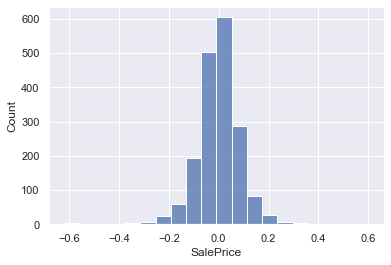

In [169]:
it_ridge2 = regx2(model= Ridge(max_iter=3000),
x_train = model_vars_data[ridge_keep],
x_test = test_vars_data[ridge_keep],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [170]:
ridge_keep = to_keep(it_ridge2,0.002)

best params:  {'alpha': 10}
score:  0.9486759421202696
  
test score:  -4.4254966780557465
adj_r2:  0.9447585423536593
  
adj_r2_test:  -5.50218439091022
 
train RMSE: 0.08687132518061784
  
test RMSE: 0.9223238765220018
                  features      coef   abs_val
0             bc_GrLivArea  0.128002  0.128002
1              OverallQual  0.062880  0.062880
2                YearBuilt  0.057720  0.057720
3              OverallCond  0.048257  0.048257
4               BsmtFinSF1  0.041749  0.041749
5              log_LotArea  0.033384  0.033384
6     Neighborhood_Somerst  0.025786  0.025786
8               GarageCond  0.023858  0.023858
7            GarageType_No  0.023693  0.023693
9          Condition1_Norm  0.021713  0.021713
10         Condition2_PosN -0.021226  0.021226
12     Exterior1st_BrkFace  0.019368  0.019368
11              Functional  0.019145  0.019145
14    Neighborhood_StoneBr  0.017600  0.017600
17    Neighborhood_NridgHt  0.017340  0.017340
15          MSSubClass_160 

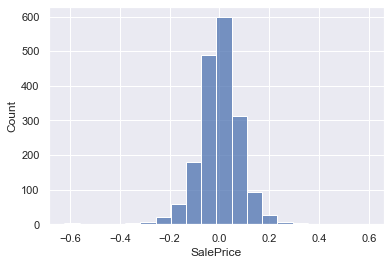

In [171]:
it_ridge3 = regx2(model= Ridge(max_iter=3000),
x_train = model_vars_data[ridge_keep],
x_test = test_vars_data[ridge_keep],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [172]:
ridge_keep = to_keep(it_ridge3,0.0025)

best params:  {'alpha': 10}
score:  0.948573017388579
  
test score:  -4.438515070268988
adj_r2:  0.944812304629242
  
adj_r2_test:  -5.4676494604891195
 
train RMSE: 0.08695838698012107
  
test RMSE: 0.9234297641998922
                  features      coef   abs_val
0             bc_GrLivArea  0.128173  0.128173
1              OverallQual  0.062883  0.062883
2                YearBuilt  0.056909  0.056909
3              OverallCond  0.048251  0.048251
4               BsmtFinSF1  0.041439  0.041439
5              log_LotArea  0.032584  0.032584
6     Neighborhood_Somerst  0.025974  0.025974
7               GarageCond  0.024166  0.024166
8            GarageType_No  0.023830  0.023830
9          Condition1_Norm  0.022090  0.022090
10         Condition2_PosN -0.021270  0.021270
11     Exterior1st_BrkFace  0.019372  0.019372
12              Functional  0.019107  0.019107
13    Neighborhood_StoneBr  0.017526  0.017526
15          MSSubClass_160 -0.017404  0.017404
14    Neighborhood_NridgHt  

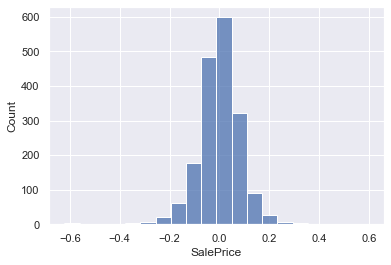

In [173]:
it_ridge4 = regx2(model= Ridge(max_iter=3000),
x_train = model_vars_data[ridge_keep],
x_test = test_vars_data[ridge_keep],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [176]:
ridge_keep = to_keep(it_ridge4,0.0026)

best params:  {'alpha': 10}
score:  0.9484322478809684
  
test score:  -4.5148868565839315
adj_r2:  0.9448252563278885
  
adj_r2_test:  -5.508408458228059
 
train RMSE: 0.08707731991524498
  
test RMSE: 0.9298909135308956
                  features      coef   abs_val
0             bc_GrLivArea  0.129021  0.129021
1              OverallQual  0.062629  0.062629
2                YearBuilt  0.053943  0.053943
3              OverallCond  0.047653  0.047653
4               BsmtFinSF1  0.041047  0.041047
5              log_LotArea  0.032655  0.032655
6     Neighborhood_Somerst  0.025895  0.025895
7               GarageCond  0.024596  0.024596
8            GarageType_No  0.024185  0.024185
9          Condition1_Norm  0.022128  0.022128
10         Condition2_PosN -0.021100  0.021100
11     Exterior1st_BrkFace  0.019519  0.019519
12              Functional  0.019114  0.019114
14          MSSubClass_160 -0.018123  0.018123
16    Neighborhood_Crawfor  0.017921  0.017921
13    Neighborhood_StoneBr

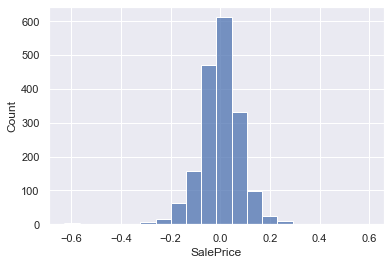

In [177]:
it_ridge5 = regx2(model= Ridge(max_iter=3000),
x_train = model_vars_data[ridge_keep],
x_test = test_vars_data[ridge_keep],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [180]:
ridge_keep = to_keep(it_ridge5,0.0027)

best params:  {'alpha': 10}
score:  0.9488206187189931
  
test score:  -4.4800441599932785
adj_r2:  0.9442493764561151
  
adj_r2_test:  -5.777718617079686
 
train RMSE: 0.08674879865028133
  
test RMSE: 0.9269487639243295
                  features      coef   abs_val
0             bc_GrLivArea  0.128593  0.128593
1              OverallQual  0.062638  0.062638
2                YearBuilt  0.056734  0.056734
3              OverallCond  0.047919  0.047919
4               BsmtFinSF1  0.041059  0.041059
5              log_LotArea  0.033139  0.033139
6     Neighborhood_Somerst  0.024479  0.024479
38           GarageType_No  0.023696  0.023696
43              GarageCond  0.023653  0.023653
7          Condition1_Norm  0.021489  0.021489
8          Condition2_PosN -0.021059  0.021059
9               Functional  0.019021  0.019021
15     Exterior1st_BrkFace  0.018821  0.018821
11    Neighborhood_Crawfor  0.017475  0.017475
13    Neighborhood_StoneBr  0.017438  0.017438
24          MSSubClass_160

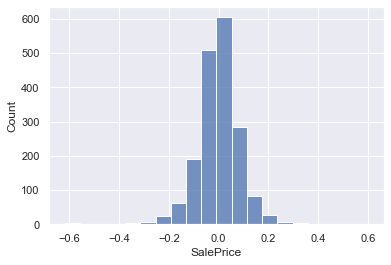

In [193]:
it_ridge6 = regx2(model= Ridge(max_iter=3000),
x_train = model_vars_data[ridge_keep],
x_test = test_vars_data[ridge_keep],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [194]:
ridge_keep = to_keep(it1_lasso,0.000053)

# romove bc_GrLivArea

no_GrLivArea = list(filter(lambda x: x != 'bc_GrLivArea',ridge_keep))

best params:  {'alpha': 100}
score:  0.9368213813458742
  
test score:  0.8931219658116436
adj_r2:  0.9312198994748511
  
adj_r2_test:  0.8680244082626206
 
train RMSE: 0.09638312797262129
  
test RMSE: 0.12945175099166556
                  features      coef   abs_val
0              OverallQual  0.070701  0.070701
22         log_first_FlrSF  0.059140  0.059140
2              OverallCond  0.041536  0.041536
39            TotRmsAbvGrd  0.039086  0.039086
3               BsmtFinSF1  0.035169  0.035169
4              log_LotArea  0.032747  0.032747
50                FullBath  0.030015  0.030015
1                YearBuilt  0.029928  0.029928
63                HalfBath  0.026915  0.026915
10    Neighborhood_Crawfor  0.020545  0.020545
9               Fireplaces  0.020468  0.020468
17          yeo_GarageArea  0.020427  0.020427
5     Neighborhood_Somerst  0.019030  0.019030
6          Condition1_Norm  0.018504  0.018504
18             KitchenQual  0.018322  0.018322
7          Condition2_Pos

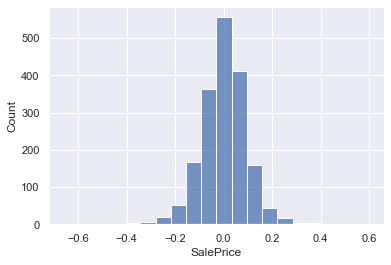

In [195]:
it_ridge7 = regx2(model= Ridge(max_iter=3000),
x_train = model_vars_data[no_GrLivArea],
x_test = test_vars_data[no_GrLivArea],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [196]:
keep8 = to_keep(it_ridge7,0.0006)

best params:  {'alpha': 100}
score:  0.9368157343595307
  
test score:  0.8930747250573168
adj_r2:  0.9313793023579741
  
adj_r2_test:  0.868804384871914
 
train RMSE: 0.09638743530046066
  
test RMSE: 0.12948035706961467
                  features      coef   abs_val
0              OverallQual  0.070799  0.070799
1          log_first_FlrSF  0.059091  0.059091
2              OverallCond  0.041524  0.041524
3             TotRmsAbvGrd  0.039103  0.039103
4               BsmtFinSF1  0.035140  0.035140
5              log_LotArea  0.032720  0.032720
6                 FullBath  0.030037  0.030037
7                YearBuilt  0.029801  0.029801
8                 HalfBath  0.026896  0.026896
9     Neighborhood_Crawfor  0.020556  0.020556
10              Fireplaces  0.020470  0.020470
11          yeo_GarageArea  0.020435  0.020435
12    Neighborhood_Somerst  0.019073  0.019073
13         Condition1_Norm  0.018525  0.018525
14             KitchenQual  0.018317  0.018317
15         Condition2_PosN

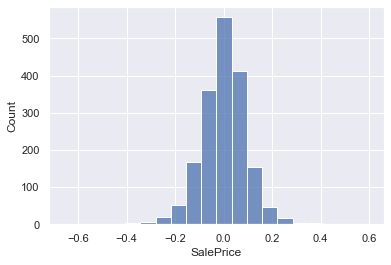

In [197]:
it_ridge8 = regx2(model= Ridge(max_iter=3000),
x_train = model_vars_data[keep8],
x_test = test_vars_data[keep8],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [198]:
keep9 = to_keep(it_ridge8,0.0001)

best params:  {'alpha': 100}
score:  0.9368157343595307
  
test score:  0.8930747250573169
adj_r2:  0.9313793023579741
  
adj_r2_test:  0.8688043848719142
 
train RMSE: 0.09638743530046064
  
test RMSE: 0.1294803570696146
                  features      coef   abs_val
0              OverallQual  0.070799  0.070799
1          log_first_FlrSF  0.059091  0.059091
2              OverallCond  0.041524  0.041524
3             TotRmsAbvGrd  0.039103  0.039103
4               BsmtFinSF1  0.035140  0.035140
5              log_LotArea  0.032720  0.032720
6                 FullBath  0.030037  0.030037
7                YearBuilt  0.029801  0.029801
8                 HalfBath  0.026896  0.026896
9     Neighborhood_Crawfor  0.020556  0.020556
10              Fireplaces  0.020470  0.020470
11          yeo_GarageArea  0.020435  0.020435
12    Neighborhood_Somerst  0.019073  0.019073
13         Condition1_Norm  0.018525  0.018525
14             KitchenQual  0.018317  0.018317
15         Condition2_PosN

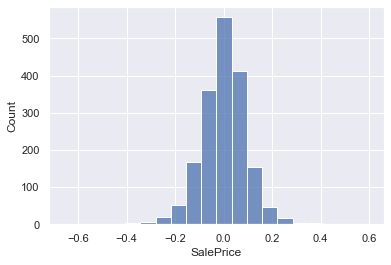

In [199]:
it_ridge9 = regx2(model= Ridge(max_iter=3000),
x_train = model_vars_data[keep9],
x_test = test_vars_data[keep9],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [200]:
keep10 = to_keep(it_ridge9,0.001)

best params:  {'alpha': 100}
score:  0.9368109139367266
  
test score:  0.8931972576131689
adj_r2:  0.9316209230550309
  
adj_r2_test:  0.8701910065015402
 
train RMSE: 0.09639111200165353
  
test RMSE: 0.12940614586445046
                  features      coef   abs_val
0              OverallQual  0.070774  0.070774
1          log_first_FlrSF  0.059210  0.059210
2              OverallCond  0.041504  0.041504
3             TotRmsAbvGrd  0.039073  0.039073
4               BsmtFinSF1  0.035219  0.035219
5              log_LotArea  0.032872  0.032872
6                 FullBath  0.030090  0.030090
7                YearBuilt  0.030048  0.030048
8                 HalfBath  0.026939  0.026939
9     Neighborhood_Crawfor  0.020464  0.020464
10              Fireplaces  0.020428  0.020428
11          yeo_GarageArea  0.020266  0.020266
12    Neighborhood_Somerst  0.019320  0.019320
13         Condition1_Norm  0.018595  0.018595
14             KitchenQual  0.018375  0.018375
15         Condition2_Pos

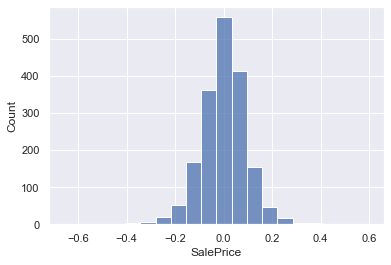

In [204]:
it_ridge10 = regx2(model= Ridge(max_iter=3000),
x_train = model_vars_data[keep10],
x_test = test_vars_data[keep10],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [202]:
keep11 = to_keep(it_ridge10,0.002)

best params:  {'alpha': 100}
score:  0.9365827683029039
  
test score:  0.893439316280648
adj_r2:  0.9320664075885706
  
adj_r2_test:  0.8738569548008284
 
train RMSE: 0.09656496636893985
  
test RMSE: 0.12925941907237426
                  features      coef   abs_val
0              OverallQual  0.070592  0.070592
1          log_first_FlrSF  0.059309  0.059309
2              OverallCond  0.041277  0.041277
3             TotRmsAbvGrd  0.038576  0.038576
4               BsmtFinSF1  0.035506  0.035506
5              log_LotArea  0.032114  0.032114
7                YearBuilt  0.031115  0.031115
6                 FullBath  0.029778  0.029778
8                 HalfBath  0.026774  0.026774
9     Neighborhood_Crawfor  0.020476  0.020476
10              Fireplaces  0.020290  0.020290
11          yeo_GarageArea  0.020246  0.020246
12    Neighborhood_Somerst  0.019256  0.019256
13         Condition1_Norm  0.018428  0.018428
14             KitchenQual  0.018408  0.018408
15         Condition2_PosN

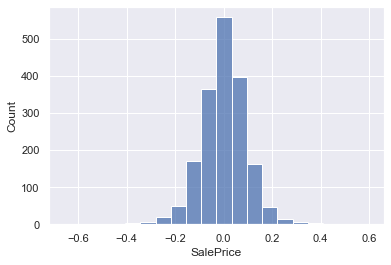

In [206]:
it_ridge11 = regx2(model= Ridge(max_iter=3000),
x_train = model_vars_data[keep11],
x_test = test_vars_data[keep11],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [207]:
keep12 = to_keep(it_ridge11,0.003)

best params:  {'alpha': 100}
score:  0.9361926835602348
  
test score:  0.8937510073383933
adj_r2:  0.9321318761498077
  
adj_r2_test:  0.8764955318384632
 
train RMSE: 0.0968615006937573
  
test RMSE: 0.12907023809000667
                  features      coef   abs_val
0              OverallQual  0.070055  0.070055
1          log_first_FlrSF  0.059479  0.059479
2              OverallCond  0.041761  0.041761
3             TotRmsAbvGrd  0.038283  0.038283
4               BsmtFinSF1  0.035854  0.035854
5              log_LotArea  0.032284  0.032284
6                YearBuilt  0.031983  0.031983
7                 FullBath  0.029154  0.029154
8                 HalfBath  0.026273  0.026273
10              Fireplaces  0.021066  0.021066
9     Neighborhood_Crawfor  0.020491  0.020491
11          yeo_GarageArea  0.019643  0.019643
12    Neighborhood_Somerst  0.019635  0.019635
13         Condition1_Norm  0.018790  0.018790
14             KitchenQual  0.018055  0.018055
15         Condition2_PosN

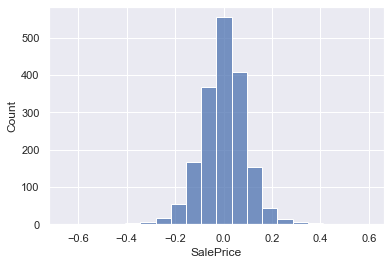

In [208]:
it_ridge12 = regx2(model= Ridge(max_iter=3000),
x_train = model_vars_data[keep12],
x_test = test_vars_data[keep12],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [209]:
keep13 = to_keep(it_ridge12,0.003)

best params:  {'alpha': 100}
score:  0.9360092724578919
  
test score:  0.8939038138700734
adj_r2:  0.9320569039920558
  
adj_r2_test:  0.8772270181460581
 
train RMSE: 0.0970006126907778
  
test RMSE: 0.12897739075412365
                  features      coef   abs_val
0              OverallQual  0.069949  0.069949
1          log_first_FlrSF  0.059480  0.059480
2              OverallCond  0.041858  0.041858
3             TotRmsAbvGrd  0.038091  0.038091
4               BsmtFinSF1  0.035630  0.035630
5              log_LotArea  0.032189  0.032189
6                YearBuilt  0.032185  0.032185
7                 FullBath  0.029081  0.029081
8                 HalfBath  0.026346  0.026346
9               Fireplaces  0.021157  0.021157
10    Neighborhood_Crawfor  0.020249  0.020249
12    Neighborhood_Somerst  0.019765  0.019765
11          yeo_GarageArea  0.019735  0.019735
13         Condition1_Norm  0.018757  0.018757
14             KitchenQual  0.017903  0.017903
15         Condition2_PosN

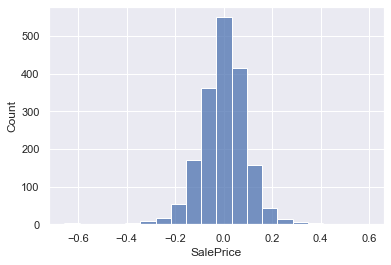

In [210]:
it_ridge13 = regx2(model= Ridge(max_iter=3000),
x_train = model_vars_data[keep13],
x_test = test_vars_data[keep13],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [211]:
keep14 = to_keep(it_ridge13,0.004)


best params:  {'alpha': 100}
score:  0.9352321134745953
  
test score:  0.8936220710494386
adj_r2:  0.9317934450534683
  
adj_r2_test:  0.8794279485648329
 
train RMSE: 0.09758786489849454
  
test RMSE: 0.12914852961690934
                 features      coef   abs_val
0             OverallQual  0.070793  0.070793
1         log_first_FlrSF  0.059693  0.059693
2             OverallCond  0.041710  0.041710
3            TotRmsAbvGrd  0.037940  0.037940
4              BsmtFinSF1  0.035805  0.035805
5             log_LotArea  0.031302  0.031302
6               YearBuilt  0.030675  0.030675
7                FullBath  0.030070  0.030070
8                HalfBath  0.026817  0.026817
9              Fireplaces  0.020894  0.020894
10   Neighborhood_Crawfor  0.020816  0.020816
11   Neighborhood_Somerst  0.020776  0.020776
12         yeo_GarageArea  0.020377  0.020377
13        Condition1_Norm  0.019954  0.019954
14            KitchenQual  0.018269  0.018269
15        Condition2_PosN -0.017738  0.01

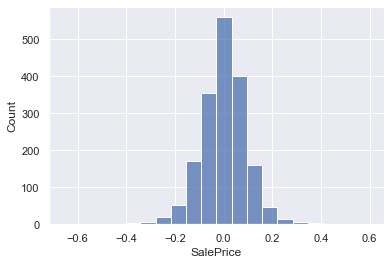

In [212]:
it_ridge14 = regx2(model= Ridge(max_iter=3000),
x_train = model_vars_data[keep14],
x_test = test_vars_data[keep14],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [213]:
keep15 = to_keep(it_ridge14,0.005)


best params:  {'alpha': 100}
score:  0.9334902266024956
  
test score:  0.8939125163565104
adj_r2:  0.9306869855759264
  
adj_r2_test:  0.8828491073479751
 
train RMSE: 0.09889143696819788
  
test RMSE: 0.1289721009927658
                 features      coef   abs_val
0             OverallQual  0.071828  0.071828
1         log_first_FlrSF  0.057197  0.057197
2             OverallCond  0.042075  0.042075
3            TotRmsAbvGrd  0.038555  0.038555
4              BsmtFinSF1  0.034392  0.034392
6               YearBuilt  0.031521  0.031521
5             log_LotArea  0.031122  0.031122
7                FullBath  0.029243  0.029243
8                HalfBath  0.026824  0.026824
10   Neighborhood_Crawfor  0.021115  0.021115
9              Fireplaces  0.021072  0.021072
13        Condition1_Norm  0.020484  0.020484
12         yeo_GarageArea  0.020387  0.020387
11   Neighborhood_Somerst  0.019131  0.019131
14            KitchenQual  0.018949  0.018949
15        Condition2_PosN -0.018135  0.018

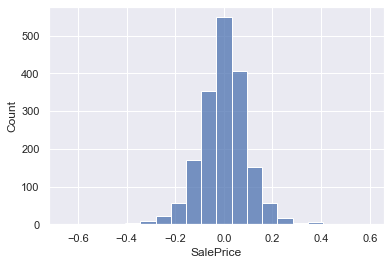

In [214]:
it_ridge15 = regx2(model= Ridge(max_iter=3000),
x_train = model_vars_data[keep15],
x_test = test_vars_data[keep15],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [215]:
keep16 = to_keep(it_ridge15,0.006)


best params:  {'alpha': 100}
score:  0.9320077611667333
  
test score:  0.8919712591201294
adj_r2:  0.9294678212103182
  
adj_r2_test:  0.8820533662427401
 
train RMSE: 0.09998748033072016
  
test RMSE: 0.13014675905655862
                 features      coef   abs_val
0             OverallQual  0.073910  0.073910
1         log_first_FlrSF  0.056659  0.056659
2             OverallCond  0.042927  0.042927
3            TotRmsAbvGrd  0.038328  0.038328
4              BsmtFinSF1  0.037154  0.037154
6             log_LotArea  0.032453  0.032453
5               YearBuilt  0.031449  0.031449
7                FullBath  0.029676  0.029676
8                HalfBath  0.027097  0.027097
9    Neighborhood_Crawfor  0.022525  0.022525
10             Fireplaces  0.021314  0.021314
11        Condition1_Norm  0.021033  0.021033
12         yeo_GarageArea  0.020538  0.020538
13   Neighborhood_Somerst  0.019153  0.019153
15        Condition2_PosN -0.018710  0.018710
14            KitchenQual  0.018439  0.01

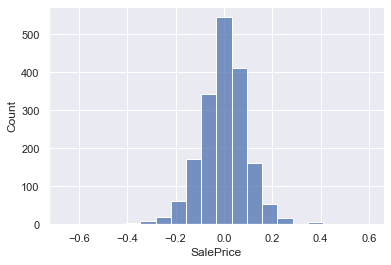

In [216]:
it_ridge16 = regx2(model= Ridge(max_iter=3000),
x_train = model_vars_data[keep16],
x_test = test_vars_data[keep16],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [217]:
keep17 = to_keep(it_ridge15,0.0063)

best params:  {'alpha': 100}
score:  0.9307536254574267
  
test score:  0.892340604813476
adj_r2:  0.9283315905680363
  
adj_r2_test:  0.88311697685508
 
train RMSE: 0.1009054151889824
  
test RMSE: 0.12992408543494224
                 features      coef   abs_val
0             OverallQual  0.072949  0.072949
1         log_first_FlrSF  0.055539  0.055539
2             OverallCond  0.043247  0.043247
3            TotRmsAbvGrd  0.038470  0.038470
4              BsmtFinSF1  0.036948  0.036948
6             log_LotArea  0.031686  0.031686
7                FullBath  0.029569  0.029569
5               YearBuilt  0.029236  0.029236
8                HalfBath  0.026435  0.026435
9    Neighborhood_Crawfor  0.023083  0.023083
10             Fireplaces  0.020999  0.020999
12         yeo_GarageArea  0.020922  0.020922
11        Condition1_Norm  0.020815  0.020815
13   Neighborhood_Somerst  0.020178  0.020178
18        yeo_TotalBsmtSF  0.019385  0.019385
15        Condition2_PosN -0.018733  0.018733

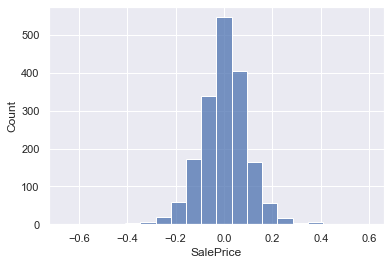

In [218]:
it_ridge17 = regx2(model= Ridge(max_iter=3000),
x_train = model_vars_data[keep17],
x_test = test_vars_data[keep17],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [234]:
# keep17 = to_keep(it_ridge15,0.0063)
keeps= list(filter(lambda x: x != 'bc_GrLivArea',model_vars_data.columns))

best params:  {'alpha': 100}
score:  0.9438898232270413
  
test score:  0.90383103150837
adj_r2:  0.9360613200282888
  
adj_r2_test:  0.8653286002825543
 
train RMSE: 0.09083155975791268
  
test RMSE: 0.12279514025146075
                  features      coef   abs_val
3          log_first_FlrSF  0.074345  0.074345
23             OverallQual  0.061648  0.061648
45             OverallCond  0.040226  0.040226
9             log_2ndFlrSF  0.037940  0.037940
28              BsmtFinSF1  0.034302  0.034302
21               YearBuilt  0.032319  0.032319
0              log_LotArea  0.030438  0.030438
2          yeo_TotalBsmtSF  0.027345  0.027345
39            TotRmsAbvGrd  0.026352  0.026352
33                FullBath  0.021912  0.021912
107        Condition1_Norm  0.019959  0.019959
4           yeo_GarageArea  0.019765  0.019765
20              Fireplaces  0.018019  0.018019
117        Condition2_PosN -0.017435  0.017435
38             KitchenQual  0.017271  0.017271
29                HalfBath 

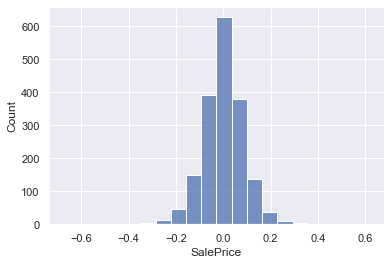

In [235]:
it_ridge18a = regx2(model= Ridge(max_iter=3000),
x_train = model_vars_data[keeps],
x_test = test_vars_data[keeps],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [236]:
keeps = to_keep(it_ridge18a,0.0002)

best params:  {'alpha': 100}
score:  0.9438899397746139
  
test score:  0.9038547951351097
adj_r2:  0.9366612515904803
  
adj_r2_test:  0.8689237330501584
 
train RMSE: 0.09083146542383723
  
test RMSE: 0.12277996779920541
                  features      coef   abs_val
0          log_first_FlrSF  0.074361  0.074361
1              OverallQual  0.061637  0.061637
2              OverallCond  0.040229  0.040229
3             log_2ndFlrSF  0.037940  0.037940
4               BsmtFinSF1  0.034289  0.034289
5                YearBuilt  0.032333  0.032333
6              log_LotArea  0.030461  0.030461
7          yeo_TotalBsmtSF  0.027334  0.027334
8             TotRmsAbvGrd  0.026343  0.026343
9                 FullBath  0.021910  0.021910
10         Condition1_Norm  0.020016  0.020016
11          yeo_GarageArea  0.019753  0.019753
12              Fireplaces  0.018012  0.018012
13         Condition2_PosN -0.017470  0.017470
14             KitchenQual  0.017275  0.017275
15                HalfBat

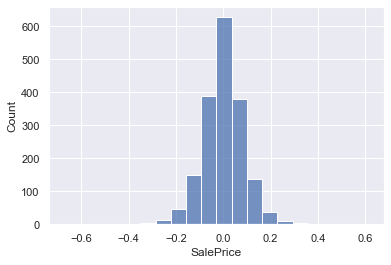

In [237]:
it_ridge18b = regx2(model= Ridge(max_iter=3000),
x_train = model_vars_data[keeps],
x_test = test_vars_data[keeps],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
cv_ = 5,
linear_reg = True,
tree_based = False)

In [238]:
keeps = to_keep(it_ridge18b,0.0005)

best params:  {'alpha': 100}
score:  0.9438902380287567
  
test score:  0.9038039228518909
adj_r2:  0.9369376585566039
  
adj_r2_test:  0.8704537149207521
 
train RMSE: 0.09083122401528453
  
test RMSE: 0.12281244612867649
                  features      coef   abs_val
0          log_first_FlrSF  0.074324  0.074324
1              OverallQual  0.061620  0.061620
2              OverallCond  0.040240  0.040240
3             log_2ndFlrSF  0.037926  0.037926
4               BsmtFinSF1  0.034257  0.034257
5                YearBuilt  0.032374  0.032374
6              log_LotArea  0.030449  0.030449
7          yeo_TotalBsmtSF  0.027347  0.027347
8             TotRmsAbvGrd  0.026381  0.026381
9                 FullBath  0.021908  0.021908
10         Condition1_Norm  0.020022  0.020022
11          yeo_GarageArea  0.019705  0.019705
12              Fireplaces  0.017978  0.017978
13         Condition2_PosN -0.017457  0.017457
14             KitchenQual  0.017260  0.017260
15                HalfBat

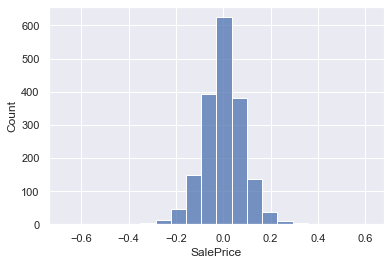

In [239]:
it_ridge18c = regx2(model= Ridge(max_iter=3000),
x_train = model_vars_data[keeps],
x_test = test_vars_data[keeps],
y_train = np.log(price_train.SalePrice),
y_test = np.log(price_test.SalePrice),
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
cv_ = 5,
linear_reg = True,
tree_based = False)